In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

In [4]:
import pandas as pd
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

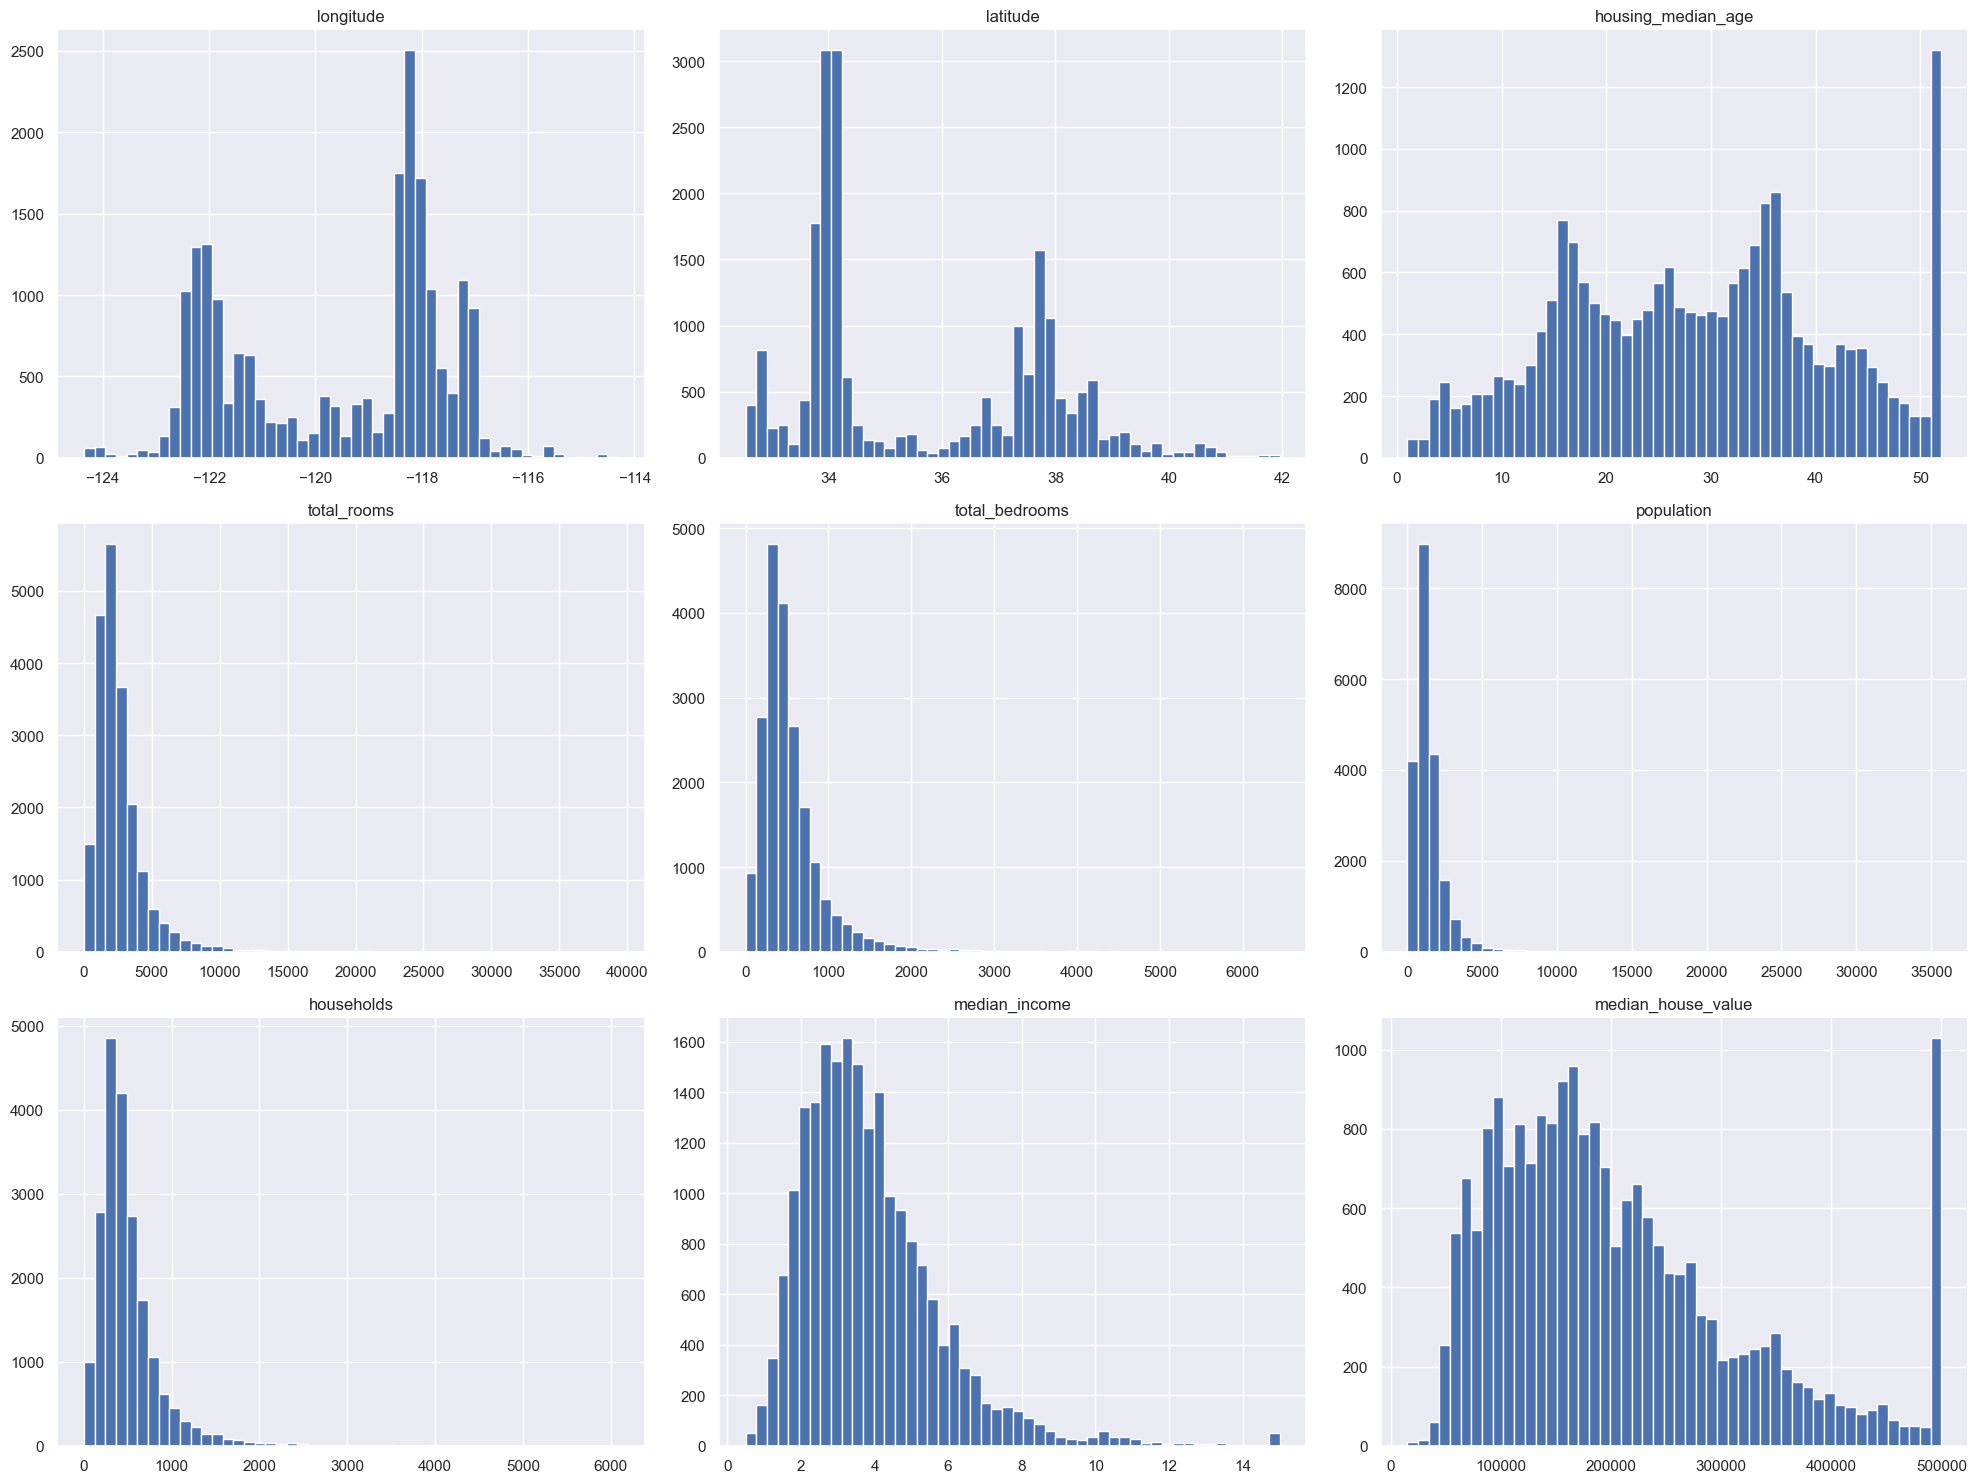

In [8]:
df.hist(bins=50,figsize=(20,15))
plt.tight_layout()
plt.show()

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df["total_bedrooms"] = imputer.fit_transform(df[["total_bedrooms"]])

In [10]:
df = pd.get_dummies(df, columns=["ocean_proximity"])

In [11]:
from sklearn.preprocessing import StandardScaler
X = df.drop("median_house_value",axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
y= df["median_house_value"]
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y , test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse = mse** 0.5
print("Root Mean Squared Error (RMS):",rmse)

Root Mean Squared Error (RMS): 69792.01557218141


In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
tree_reg  = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train,y_train)
y_pred_tree = tree_reg.predict(X_test)
mse_tree = mean_squared_error(y_test,y_pred_tree)
rmse_tree = mse_tree ** 0.5
print("Decision Tree Mean Squared Error (RMS):",rmse_tree)

Decision Tree Mean Squared Error (RMS): 68480.6629930436


In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train,y_train)
y_pred_forest = forest_reg.predict(X_test)
mse_forest = mean_squared_error(y_test,y_pred_forest)
rmse_forest = mse_forest ** 0.5
print("Random Forest Mean Squared Error (RMS):",rmse_forest)

Random Forest Mean Squared Error (RMS): 49483.880373280226


In [ ]:
housing = pd.read_csv("housing.csv")
housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
from sklearn.impute import SimpleImputer

num_attribs = housing.drop("ocean_proximity", axis=1).columns.tolist()
cat_attribs = ["ocean_proximity"]
num_pipline = Pipeline([('std_scaler',StandardScaler()),("imputer",SimpleImputer(strategy="median"))])
full_pipline = ColumnTransformer([("num",num_pipline,num_attribs),("cat", OneHotEncoder(),cat_attribs)])
housing_prepared = full_pipline.fit_transform(housing)
X_train,X_test,y_train,y_test = train_test_split(housing_prepared, housing_labels , test_size=0.2, random_state=42)
cat_encoder = full_pipline.named_transformers_["cat"]
cat_onehot_attribs = list[cat_encoder.get_feature_names_out(cat_attribs)]
all_attribs = full_pipline.get_feature_names_out()
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared,housing_labels)


features_importances = forest_reg.feature_importances_

print("تعدادد ویژگی ها:" , len(all_attribs))
print("تعداد importance ها:" , len(features_importances))
features = pd.DataFrame({'Feature': all_attribs, 'Importance':features_importances })

features_sorted = features.sort_values(by='Importance',ascending=False)

print(features_sorted)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
print("MSE scores on each fold:")
print(scores)
print("\n avrage of MSE:", scores.mean())

MSE scores on each fold:
[-2.80050016e+09 -2.53827157e+09 -2.54255071e+09 -2.32870626e+09
 -2.31341809e+09 -2.20522475e+09 -1.97945900e+09 -2.21132768e+09
 -2.45083349e+09 -2.29653975e+09]

 avrage of MSE: -2366683147.0015182


In [ ]:
rmse_scores = np.sqrt(-scores)
print("RMSE scores on each fold:")
print(rmse_scores)
print("\n avrage of RMSE:", rmse_scores.mean())

RMSE scores on each fold:
[52919.75210528 50381.26205611 50423.71180575 48256.67066742
 48098.00505013 46959.82056422 44491.11151688 47024.75603315
 49505.893535   47922.22604055]

 avrage of RMSE: 48598.32093744916


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

housing_prepared = full_pipline.fit_transform(housing)
gbrt = GradientBoostingRegressor(random_state=42)
gbrt.fit(housing_prepared,housing_labels)
scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)
print("RMSE scores on each fold:")
print(rmse_scores)
print("\n avrage of RMSE:", rmse_scores.mean())

RMSE scores on each fold:
[53173.21054953 50356.87527413 50353.47549423 48264.91240059
 48148.73307977 46686.69140306 44572.53985646 46928.95431272
 49434.06490399 47698.83907575]

 avrage of RMSE: 48561.829635022455


In [ ]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor(random_state= 42)
xgb_reg.fit(housing_prepared,housing_labels)
scores = cross_val_score(forest_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)
print("RMSE scores on each fold:")
print(rmse_scores)
print("\n avrage of RMSE:", rmse_scores.mean())

NameError: name 'full_pipline' is not defined